![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# River and Lake Water Levels

Have you ever wondered what a lake's water levels can reveal? Investigating a lake's water levels can provide valuable insight into its hydrological behaviour. By analyzing the fluctuations and patterns in water levels, we can gain a better sense of lake dynamics and make informed decisions in regard to the surrounding ecosystem.

The [Shuswap Lake](https://bcparks.ca/shuswap-lake-park/) is a beautiful and popular freshwater lake located in British Columbia, and it will be the primary body of water that we'll be exploring throughout this notebook.

### Import the Data
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [45]:
## import libraries
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium.plugins import MarkerCluster

The Shuswap Lake is a popular and large lake in the Okanagan Region of the province of British Columbia. The water levels of this particular lake fluctuates over the year due to rain fall and snow run off coming from the mountains. We'll be exploring the intricacies of the Shuswap Lake, alongside other bodies of water throughout the notebook.

[![Shuswap Lake](https://img.youtube.com/vi/1fJlFh4eJ08/0.jpg)](https://www.youtube.com/watch?v=1fJlFh4eJ08)

### Introductory Analysis

Let's take a look at the most recent water level data about the Shuswap Lake. Datasets were obtained from the [Government of Canada](https://dd.weather.gc.ca/hydrometric/).

In [46]:
station = "08LE070"
shuswap_data= pd.read_csv(f'https://dd.weather.gc.ca/hydrometric/csv/BC/daily/BC_{station}_daily_hydrometric.csv')
display(shuswap_data)
print(shuswap_data.columns, sep='\n')

ID                       Date  Water Level / Niveau d'eau (m)  \
0     08LE070  2023-05-13T00:00:00-08:00                         346.773   
1     08LE070  2023-05-13T00:05:00-08:00                         346.772   
2     08LE070  2023-05-13T00:10:00-08:00                         346.771   
3     08LE070  2023-05-13T00:15:00-08:00                         346.772   
4     08LE070  2023-05-13T00:20:00-08:00                         346.775   
...       ...                        ...                             ...   
8561  08LE070  2023-06-11T17:35:00-08:00                         347.882   
8562  08LE070  2023-06-11T17:40:00-08:00                         347.881   
8563  08LE070  2023-06-11T17:45:00-08:00                         347.880   
8564  08LE070  2023-06-11T17:50:00-08:00                         347.880   
8565  08LE070  2023-06-11T17:55:00-08:00                         347.877   

      Grade  Symbol / Symbole  QA/QC  Discharge / Débit (cms)  Grade.1  \
0       NaN               NaN      1                      NaN      NaN   
1       NaN               NaN      1                      NaN      NaN   
2       NaN               NaN      1                      NaN      NaN   
3       NaN               NaN      1                      NaN      NaN   
4       NaN               NaN      1                      NaN      NaN   
...     ...               ...    ...                      ...      ...   
8561    NaN               NaN      1                      NaN      NaN   
8562    NaN               NaN      1                      NaN      NaN   
8563    NaN               NaN      1                      NaN      NaN   
8564    NaN               NaN      1                      NaN      NaN   
8565    NaN               NaN      1                      NaN      NaN   

      Symbol / Symbole.1  QA/QC.1  
0                    NaN      NaN  
1                    NaN      NaN  
2                    NaN      NaN  
3                    NaN      NaN  
4                    NaN      NaN  
...                  ...      ...  
8561                 NaN      NaN  
8562                 NaN      NaN  
8563                 NaN      NaN  
8564                 NaN      NaN  
8565                 NaN      NaN  

[8566 rows x 10 columns]

Index([' ID', 'Date', 'Water Level / Niveau d'eau (m)', 'Grade',
       'Symbol / Symbole', 'QA/QC', 'Discharge / Débit (cms)', 'Grade.1',
       'Symbol / Symbole.1', 'QA/QC.1'],
      dtype='object')


We notice in our dataset that we have _10_ different columns. In particular, `Water Level / Niveau d'eau (m)` and `Date` appear to be the most important as we can investigate correlations on whether certain dates have ascending or descending water levels.

For now, let's isolate these important columns and visualize them in a __plot__ to see if there are any trends. 

In [47]:
# Display dataframe by date and water level
shuswap_data[["Date", "Water Level / Niveau d'eau (m)"]]

Date  Water Level / Niveau d'eau (m)
0     2023-05-13T00:00:00-08:00                         346.773
1     2023-05-13T00:05:00-08:00                         346.772
2     2023-05-13T00:10:00-08:00                         346.771
3     2023-05-13T00:15:00-08:00                         346.772
4     2023-05-13T00:20:00-08:00                         346.775
...                         ...                             ...
8561  2023-06-11T17:35:00-08:00                         347.882
8562  2023-06-11T17:40:00-08:00                         347.881
8563  2023-06-11T17:45:00-08:00                         347.880
8564  2023-06-11T17:50:00-08:00                         347.880
8565  2023-06-11T17:55:00-08:00                         347.877

[8566 rows x 2 columns]

In [48]:
px.line(shuswap_data, x="Date", y="Water Level / Niveau d'eau (m)",title="Shuswap Lake Levels")

### Questions:

1. Is there an ascending, (going upwards), descending (going downwards), or no trend in the visualization? 
1. Can you think of reasons why particular months would have ascending or descending trends?
2. Does the rate of growth between water levels and months surprise you? Do you think the growth should be slower or faster? 

### A Deeper Dive

Now that we have investigated correlations ranging in the past couple of months, let's delve into datasets that explore different attributes regarding water levels. In particular, by looking into specialized datasets from the [Government of Canada](https://wateroffice.ec.gc.ca/mainmenu/real_time_data_index_e.html).

In [49]:
extreme_data = pd.read_csv("https://raw.githubusercontent.com/callysto/data-files/main/Science/WaterLevels/annual_extremes.csv", skiprows=1)
extreme_data.head()

ID  PARAM  Year  MM--DD      MAX  SYM MM--DD.1  MIN SYM.1
0  08LE070      2  1951  05--28  347.850  NaN      NaN  NaN   NaN
1  08LE070      2  1952  06--11  348.246  NaN      NaN  NaN   NaN
2  08LE070      2  1953  06--18  348.094  NaN      NaN  NaN   NaN
3  08LE070      2  1954  07--10  348.749  NaN      NaN  NaN   NaN
4  08LE070      2  1955  07--01  348.841  NaN      NaN  NaN   NaN

The dataset *extreme_data* obtained above explores the extremities of the Shuswap Lake, that being the `minimum` and `maximum` water levels throughout a year.

In [50]:
shuswap_annual = pd.read_csv("https://raw.githubusercontent.com/callysto/data-files/main/Science/WaterLevels/shuswap_data.csv", skiprows=1)
shuswap_annual.head()

ID  PARAM  YEAR   DD    Value  SYM
0  08LE070      2  1951  136  346.966  NaN
1  08LE070      2  1951  137  347.042  NaN
2  08LE070      2  1951  138  347.179  NaN
3  08LE070      2  1951  139  347.256  NaN
4  08LE070      2  1951  140  347.332  NaN

The dataset *shuswap_annual* obtained above explores the water level of the Shuswap Lake throughout an entire year spanning from *1951* to *2021*.

### Data Cleaning

Data cleaning is like tidying up information to make it useful and accurate. Just like you clean and organize your room, data cleaning helps make data neat and organized.

Imagine you have a bunch of information about your classmates, like their names, ages, and favorite colors. But sometimes, mistakes or errors can happen when collecting this information. For example, someone may have misspelled a name or entered the wrong age for a classmate.

Data cleaning involves finding and fixing these mistakes. It's important because clean data helps us make better decisions and find meaningful patterns.

In this particular situation, we want to remove the columns `SYM` and `SYM.1`. These columns are mainly composed of **NaN** values, or no value at all meaning many of the rows do not contain a value for these columns. This essentially means that `SYM` and `SYM.1` have almost nothing to do with water levels and most likely would lead to little insight. 

In [51]:
# Drop the columns SYM, SYM.1
extreme_data = extreme_data.drop(columns=['SYM', 'SYM.1']) 
shuswap_annual = shuswap_annual.drop(columns=['SYM'])

Now that our dataset has been *cleaned*, let's find the highest and lowest extremities within our dataset, that being the year, month, and day of when the highest/lowest water-level was recorded.

In [52]:
max_level = extreme_data.query('MAX == MAX.max()')
min_level = extreme_data.query('MIN == MIN.min()')

maxvals = max_level.to_numpy()
minvals = min_level.to_numpy()


print(f"The highest water-level recorded was {maxvals[0][4]} (meters) in {maxvals[0][2]}-{maxvals[0][3].replace('--', '-')}")
print(f"The lowest water-level recorded was {minvals[0][4]} (meters) in {minvals[0][2]}-{minvals[0][5].replace('--', '-')}")

The highest water-level recorded was 349.667 (meters) in 1972-06-14
The lowest water-level recorded was 347.53 (meters) in 1980-02-27


Surprisingly, both the highest and lowest water-levels recorded was in late 1900s. The highest water-level recorded was on May 14th while the lowest water-level recorded was on February 27th. 

Can you think of any particular reasons why water-levels would be high during the month of May, and vice-versa, can you think of any reason why water-levels would be low during the month of February?

Now that we have the year, month, and date of the highest and lowest water-levels recorded, let's visualize the highest and lowest water-level years alongside the extremeities from 1951-2021 and see if any trends are apparent.

In [53]:
max_year = shuswap_annual.query(f'YEAR == {maxvals[0][2]}')
min_year = shuswap_annual.query(f'YEAR == {minvals[0][2]}')

queried_fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("Highest Water Level Year (1972)", "Lowest Water Level Year (1980)"), x_title="Days", y_title="Water Level (m)")

queried_fig.add_trace(
    go.Scatter(x=max_year['DD'], y=max_year['Value']),
    row=1, col=1
)

queried_fig.add_trace(
    go.Scatter(x=min_year['DD'], y=min_year['Value']),
    row=1, col=2
)

queried_fig.update_layout(showlegend=False)
queried_fig.show()

Looking at both plots, while it is clear that the highest and lowest extremities contain their respective maximums and minimums, it's also interesting to note that in the year of the lowest water-level, general trends of lower levels of water are apparent. 

Comparing maximums between the lowest and highest water-level years, the gap is significant and distinctly apparent. What do you think happened during the year of 1980 in Lake Shuswap which could have potentially caused these low water-levels?

In [54]:
max_data = extreme_data.dropna(subset=['MAX'])
min_data = extreme_data.dropna(subset=['MIN'])

max_min_fig = make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=("Highest Water Levels", "Lowest Water Level"), x_title="Year", y_title="Water Level (m)")

max_min_fig.add_trace(
    go.Scatter(x=max_data['Year'], y=max_data['MAX']),
    row=1, col=1
)

max_min_fig.add_trace(
    go.Scatter(x=min_data['Year'], y=min_data['MIN']),
    row=1, col=2
)
max_min_fig.update_layout(showlegend=False)
max_min_fig.show()

Surprisingly, despite the global sea-level rise of approximately 21-24 centimeters since the past 150 years, it appears that Lake Shuswap's minimum and maximum extremities haven't changed much despite the 70 year gap.  

To take a deeper look, let's compare the overall water-levels of years and see if we can compare any apparent differences.

In [55]:
half_way1 = shuswap_annual.query(f'YEAR <= 1985')
half_way2 = shuswap_annual.query(f'YEAR >= 1986')

all_figs= px.scatter(shuswap_annual, x='DD', y='Value', color='YEAR', labels={'Value': 'Water Level (m)'}, title="Shuswap Lake Water-Levels from 1951 to 2021").show()
half_way_fig1 = px.scatter(half_way1, x='DD', y='Value', color='YEAR', labels={'Value': 'Water Level (m)'}, title="Shuswap Lake Water-Levels from 1985 to 1951").show()
half_way_fig2 = px.scatter(half_way2, x='DD', y='Value', color='YEAR', labels={'Value': 'Water Level (m)'}, title="Shuswap Lake Water-Levels from 1986 to 2021").show()

From looking at all years, years 1985 below, and 1986 and above, it appears that there still aren't any major differences that can lead to the conclusion to say Lake Shuswap water-levels are increasing or decreasing. 

This may come as surprising as global media has highlighted the dangers of the constantly rising sea-level but sometimes changes in local areas may not reflect changes seen in a global scale. This isn't to discredit the increases in sea-level as fictitious but conditions surrounding a particular area may make it less susceptible to change compared to other bodies of water.

### Predictions on Water-Levels

Now that we've done analysis on the extremities within Lake Shuswap, let's see if we can *predict* what future water levels could potentially look like.

To predict future water levels, we utilize what is known as **machine learning**. Machine learning is an interesting field where it focuses on teaching computers how to learn and make decisions without being explicitly programmed. It's like training a computer to think and make *predictions*, just like humans do.

Think of machine learning similar to when you're learning something *new*, you often need examples and consistent practice to get better at it. For example, when you learn to ride a bicycle, you might start with training wheels or someone holding the bike steady for you. Over time, you start to learn how to balance and pedal on your own. Machine learning works similarly.

In machine learning, instead of telling a computer exactly what to do step by step, we provide it with lots of examples and let it figure out patterns and rules on its own. We give the computer a large dataset, which is like a collection of examples, and it uses this data to learn and make predictions or decisions.

Let's obtain data from the year **2021** from the `YEAR` column. By doing so, we have access to all 365 days within the year, so we can give a variety of accurate data points for our model. 

In [56]:
sect_shuswap_annual = shuswap_annual.query('YEAR == 2021')
display(sect_shuswap_annual)

ID  PARAM  YEAR   DD    Value
13188  08LE070      2  2021    1  345.400
13189  08LE070      2  2021    2  345.391
13190  08LE070      2  2021    3  345.388
13191  08LE070      2  2021    4  345.387
13192  08LE070      2  2021    5  345.387
...        ...    ...   ...  ...      ...
13548  08LE070      2  2021  361  345.972
13549  08LE070      2  2021  362  345.944
13550  08LE070      2  2021  363  345.920
13551  08LE070      2  2021  364  345.899
13552  08LE070      2  2021  365  345.877

[365 rows x 5 columns]

Having many data points in machine learning is like having a lot of examples to learn from. Imagine you're trying to learn how to identify different types of fruits. 

If you only have a *few* fruits to practice with, like an apple and a banana, it might be challenging to recognize other fruits like oranges or strawberries. But if you have a big basket filled with many different fruits, you can learn to recognize a *wider* variety. Furthermore, if you supply the basket with apples that are slightly different from one another, you could become more familiar with *distinguishing* what makes a fruit an apple or not due to knowing these slight differences.

Now that we have the data points that we want to train our model on, let's see what visualization the model outputs. 

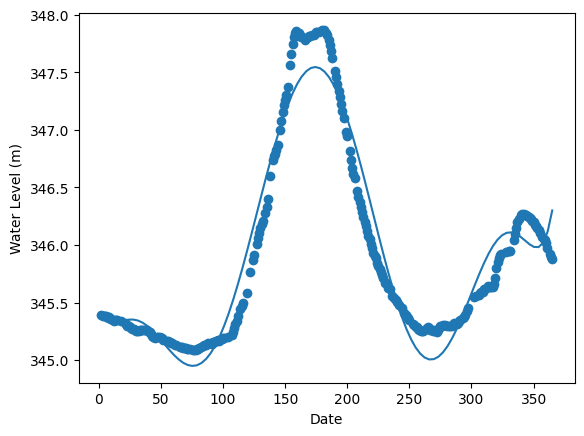

In [57]:
X_data = sect_shuswap_annual['DD'].to_numpy()
y_data = sect_shuswap_annual["Value"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)
mymodel = np.poly1d(np.polyfit(X_train, y_train, 8))
myline = np.linspace(min(X_train), max(X_train), 100)

plt.scatter(X_train, y_train)
plt.plot(myline, mymodel(myline))
plt.xlabel("Date")
plt.ylabel("Water Level (m)")
plt.show()

Looking above, it appears that the curve that estimates where certain points would be on alongside the x or`Date` axis is estimating the data points fairly well. While certain points of the curve may be slightly off, this actually indicates that our model isn't performing overly too well as this would be considered **overfitting**. 

In machine learning, overfitting happens when a model gets too focused on the specific details of the training data, and it fails to generalize well to new, unseen data. In other words, the model becomes too *specialized* in the training data and doesn't understand the broader patterns and concepts that are necessary for making accurate predictions.

In [58]:
from sklearn.metrics import r2_score

error = r2_score(y_test, mymodel(X_test))
print(f"The R-Squared Error for this Model is {error}")

The R-Squared Error for this Model is 0.9501814124229941


Looking above, **R-Squared Error** is a term which essentially evaluates how well the model represented the data and how well our curve fit the data points we supplied it. A score of 0 means our curve didn't fit the data at all, while a score of 1 means that the curve perfectly fit every data point onto our curve. Generally, a score of 0.90 or 90% and above indicates a *very good* fit of the model to our data.

Now, let's input some potential predicted values based on our model. In the code cell below, alter the value of `prediction` which is currently set to **1** and see what the model predicts.

In [59]:
# Input a prediction from 1-365
# For example, instead of setting prediction = 1, you could input prediction = 155
prediction = 1 
print(f"The predicted value for a date of {prediction} is {mymodel(prediction)}")

The predicted value for a date of 1 is 345.4052116674501


Using our new model, let's obtain all 365 days of a year and output a figure of what our model would predict certain water levels would be based on the training data we gave it.

In [60]:
predicted_values = []
predicted_dates = []
for i in range(1, 366):
    predicted_values.append(mymodel(i))
    predicted_dates.append(i)

In [61]:
fig = make_subplots(rows=1, cols=2, shared_xaxes=True, subplot_titles=("Actual Water Levels", "Predicted Water Levels"), x_title="Date", y_title="Water Level (m)")

fig.add_trace(
    go.Scatter(x=X_data, y=y_data),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=predicted_dates, y=predicted_values),
    row=1, col=2
)
fig.update_layout(showlegend=False)
fig.show()

### Questions:

1. What are the potential benefits of using machine learning to analyze historical water level data of a lake? How could this information be valuable for managing water resources or planning activities around the lake?
2. How could understanding the patterns and trends in lake water levels through machine learning help in mitigating natural disasters on surrounding ecosystem and communities?
3. How could machine learning models that predict lake water levels be integrated into existing monitoring systems or early warning systems? What are the potential advantages and challenges of such integration?

### Map of Stations


We can also compare water stations throughout Canada using real-time hydrometric data provided by the [Government of Canada](https://wateroffice.ec.gc.ca/map/index_e.html). 

Using the map provided below, find a particular water station you're interested in and take note of the **province** the water station is in and **station number** of the water station.

In [62]:
df = pd.read_csv('https://wateroffice.ec.gc.ca/map/download_e.html?type=real_time&filters=%7B%22station_id%22%3A%22%22%2C%22station_name%22%3A%22%22%2C%22province%22%3A%22all%22%2C%22region%22%3A%22CAN%22%2C%22basin%22%3A%22all%22%2C%22parameter%22%3A%22all%22%2C%22operation_schedule%22%3A%22all%22%2C%22operating_agency%22%3A%22all%22%7D')
latitude = df['Latitude'].mean()
longitude = df['Longitude'].mean()
station_map = folium.Map(location=[latitude,longitude], zoom_start=3)
marker_cluster = MarkerCluster()
for row in df.iterrows():
    marker_cluster.add_child(folium.Marker(location=[row[1]['Latitude'],row[1]['Longitude']], popup=[row[1]['Station Name'], row[1]['Station ID']]))
station_map.add_child(marker_cluster)
station_map

In the cell below, add the **province** of the water station in the format of 2 letters. For example, for Alberta you would input 'AB' for the `province` variable.

Similarly, change the variable `station_map_num` to water station number you want to explore.

In [63]:
# Add you province in the format of 2 letters such as AB, BC, ON, etc.
# For example, instead of province = 'BC', you could input province = 'AB'
province = 'BC'

# Add your station map number here
# for example, instead of station_map_num = '07ED001', you could input '07KC001'
station_map_num = "07ED001"

Now that you've inputted the station information, let's visualize what the data looks like in a *dataframe*, and also *compare* what the trends of water levels are with the Shuswap Lake. 

In [64]:
# import data
otherwater_data= pd.read_csv(f'https://dd.weather.gc.ca/hydrometric/csv/{province}/daily/{province}_{station_map_num}_daily_hydrometric.csv')
otherwater_data

ID                       Date  Water Level / Niveau d'eau (m)  \
0     07ED001  2023-05-13T00:00:00-08:00                           2.674   
1     07ED001  2023-05-13T00:05:00-08:00                           2.677   
2     07ED001  2023-05-13T00:10:00-08:00                           2.673   
3     07ED001  2023-05-13T00:15:00-08:00                           2.679   
4     07ED001  2023-05-13T00:20:00-08:00                           2.674   
...       ...                        ...                             ...   
8560  07ED001  2023-06-11T17:20:00-08:00                           1.780   
8561  07ED001  2023-06-11T17:25:00-08:00                           1.781   
8562  07ED001  2023-06-11T17:30:00-08:00                           1.778   
8563  07ED001  2023-06-11T17:35:00-08:00                           1.778   
8564  07ED001  2023-06-11T17:40:00-08:00                           1.778   

      Grade  Symbol / Symbole  QA/QC  Discharge / Débit (cms)  Grade.1  \
0       NaN               NaN      2                    255.0      NaN   
1       NaN               NaN      2                    255.0      NaN   
2       NaN               NaN      2                    255.0      NaN   
3       NaN               NaN      2                    256.0      NaN   
4       NaN               NaN      2                    255.0      NaN   
...     ...               ...    ...                      ...      ...   
8560    NaN               NaN      1                    115.0      NaN   
8561    NaN               NaN      1                    116.0      NaN   
8562    NaN               NaN      1                    115.0      NaN   
8563    NaN               NaN      1                    115.0      NaN   
8564    NaN               NaN      1                    115.0      NaN   

      Symbol / Symbole.1  QA/QC.1  
0                    NaN        1  
1                    NaN        1  
2                    NaN        1  
3                    NaN        1  
4                    NaN        1  
...                  ...      ...  
8560                 NaN        1  
8561                 NaN        1  
8562                 NaN        1  
8563                 NaN        1  
8564                 NaN        1  

[8565 rows x 10 columns]

In [65]:
compare_fig = make_subplots(rows=1, cols=2, subplot_titles=("Shuswap Water Levels", "Other Water Levels"), x_title="Date", y_title="Water Level (m)")

compare_fig.add_trace(
    go.Scatter(x=shuswap_data['Date'], y=shuswap_data["Water Level / Niveau d'eau (m)"]),
    row=1, col=1
)

compare_fig.add_trace(
    go.Scatter(x=otherwater_data['Date'], y=otherwater_data["Water Level / Niveau d'eau (m)"]),
    row=1, col=2
)

compare_fig.update_layout(showlegend=False)
compare_fig.show()

### Questions:

1. How do the plots of water levels between the two bodies of water differ? Similarly, how are the bodies of water similar? Are there any noticeable patterns or trends that stand out?
2. What factors might contribute to the differences in water level plots between the two bodies of water? Consider geographical, environmental, or human-related factors.
3. Reflect on the limitations and uncertainties in comparing water level plots between two bodies of water. What factors might introduce biases or errors in the comparison, and how can we account for these limitations?

# Conclusion

The Canadian Government provides information in regard to large bodies of water, known as [hydrometric data](https://wateroffice.ec.gc.ca/mainmenu/real_time_data_index_e.html). In this notebook, we imported this data and identified potential trends apparent in water level data alongside predictions of future water levels through machine learning.

Perhaps you can try extension activities such as utilizing machine learning to different fields of science, such as predicting a classmate's height, or seeing what a house would be priced at based on the size of the house.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)